![bees](bees.jpg)

# Which plants are better for bees: native or non-native?

## 📖 Background
You work for the local government environment agency and have taken on a project about creating pollinator bee-friendly spaces. You can use both native and non-native plants to create these spaces and therefore need to ensure that you use the correct plants to optimize the environment for these bees.

The team has collected data on native and non-native plants and their effects on pollinator bees. Your task will be to analyze this data and provide recommendations on which plants create an optimized environment for pollinator bees.

## 💾 The Data
You have assembled information on the plants and bees research in a file called `plants_and_bees.csv`. Each row represents a sample that was taken from a patch of land where the plant species were being studied.

| Column     | Description              |
|------------|--------------------------|
| `sample_id` | The ID number of the sample taken. |
| `species_num` | The number of different bee species in the sample. |
| `date` | Date the sample was taken. |
| `season` | Season during sample collection ("early.season" or "late.season"). |
| `site` | Name of collection site. |
| `native_or_non` | Whether the sample was from a native or non-native plant. |
| `sampling` | The sampling method. |
| `plant_species` | The name of the plant species the sample was taken from. None indicates the sample was taken from the air. |
| `time` | The time the sample was taken. |
| `bee_species` | The bee species in the sample. |
| `sex` | The gender of the bee species. |
| `specialized_on` | The plant genus the bee species preferred. |
| `parasitic` | Whether or not the bee is parasitic (0:no, 1:yes). |
| `nesting` | The bees nesting method. |
| `status` | The status of the bee species. |
| `nonnative_bee` | Whether the bee species is native or not (0:no, 1:yes). |

[Source](https://datadryad.org/stash/dataset/doi%253A10.5061%252Fdryad.pzgmsbcj8) (data has been modified)

## 💪 Challenge
Provide your agency with a report that covers the following:
* Which plants are preferred by native vs non-native bee species?
* A visualization of the distribution of bee and plant species across one of the samples.
* Select the top three plant species you would recommend to the agency to support native bees.

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("data/plants_and_bees.csv")

# See what we are working with. 🕵🏽‍♀️

In [260]:
data.head(20)
data.sort_values(by='nonnative_bee')

,sample_id,species_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
0,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
839,17453,20,07/18/2017,late.season,B,native,pan traps,None,935,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
838,17453,20,07/18/2017,late.season,B,native,pan traps,None,935,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
837,17453,20,07/18/2017,late.season,B,native,pan traps,None,935,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
836,17453,20,07/18/2017,late.season,B,native,pan traps,None,935,Bombus impatiens,f,NaN,0.0,ground,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,17460,51,07/03/2017,early.season,C,non-native,pan traps,None,1105,Megachile exilis,f,NaN,NaN,NaN,NaN,NaN
929,17460,51,07/03/2017,early.season,C,non-native,pan traps,None,1105,Megachile exilis,f,NaN,NaN,NaN,NaN,NaN
951,17462,43,07/18/2017,late.season,A,native,pan traps,None,915,Lasioglossum weemsi,f,NaN,NaN,NaN,NaN,NaN
1172,17475,8,08/01/2017,late.season,A,native,hand netting,Rudbeckia triloba,1205,Lasioglossum,m,NaN,NaN,ground,NaN,NaN


In [261]:
data.shape

(1250, 16)

In [262]:
data.dtypes

sample_id           int64
species_num         int64
date               object
season             object
site               object
native_or_non      object
sampling           object
plant_species      object
time                int64
bee_species        object
sex                object
specialized_on     object
parasitic         float64
nesting            object
status             object
nonnative_bee     float64
dtype: object

In [263]:
#start cleaning data
data['plant_species'].replace('None', np.nan, inplace=True)

In [264]:
# Convert "time" column to string and pad it with zeros to ensure it has 4 digits
data['time'] = data['time'].astype(str).str.zfill(4)

In [265]:
assert data['time'].dtypes == 'object'

In [266]:
# Merge "date" and "time" columns and convert them to datetime format
data['timestamp'] = pd.to_datetime(data['date'] + ' ' + data['time'], format='%m/%d/%Y %H%M')


In [267]:
cols = ['specialized_on', 'status', 'date', 'time']
data.drop(cols, axis=1, inplace=True)

In [268]:
data['season'] = data['season'].str.replace('.', '_')

In [269]:
#rename column for clarity. 0=non-native, 1=native
data.rename(
    columns=({ 'nonnative_bee': 'native_bee'}), 
    inplace=True,
)
#drop null values from native_bee column
data = data.dropna(subset=['native_bee'])

In [270]:
data.sort_values(by='native_bee')

,sample_id,species_num,season,site,native_or_non,sampling,plant_species,bee_species,sex,parasitic,nesting,native_bee,timestamp
0,17400,23,early_season,A,native,pan traps,NaN,Augochlorella aurata,f,0.0,ground,0.0,2017-04-18 09:35:00
839,17453,20,late_season,B,native,pan traps,NaN,Halictus poeyi/ligatus,f,0.0,ground,0.0,2017-07-18 09:35:00
838,17453,20,late_season,B,native,pan traps,NaN,Halictus poeyi/ligatus,f,0.0,ground,0.0,2017-07-18 09:35:00
837,17453,20,late_season,B,native,pan traps,NaN,Halictus poeyi/ligatus,f,0.0,ground,0.0,2017-07-18 09:35:00
836,17453,20,late_season,B,native,pan traps,NaN,Bombus impatiens,f,0.0,ground,0.0,2017-07-18 09:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,17411,17,early_season,B,non-native,pan traps,NaN,Apis mellifera,f,0.0,hive,1.0,2017-05-02 09:30:00
976,17464,34,late_season,A,non-native,pan traps,NaN,Anthidium manicatum,m,0.0,wood/cavities,1.0,2017-07-18 09:15:00
182,17413,32,early_season,C,native,pan traps,NaN,Apis mellifera,f,0.0,hive,1.0,2017-05-02 09:15:00
58,17402,20,early_season,B,native,pan traps,NaN,Apis mellifera,f,0.0,hive,1.0,2017-04-18 09:50:00


In [271]:
data.shape

(1189, 13)

# Question 1: Which plants are preferred by native vs non-native bee species?

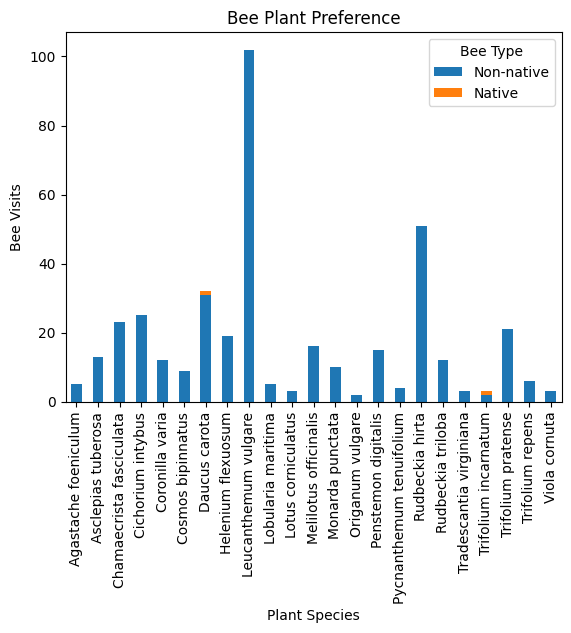

In [272]:
# Visualization 1: Bar chart shows which plants are preferred by native vs non-native bee species
preferences = data.groupby(['plant_species', 'native_bee'])['native_bee'].size().unstack()
preferences.plot( kind='bar', stacked=True)
plt.xlabel('Plant Species')
plt.ylabel('Bee Visits')
plt.title('Bee Plant Preference')
plt.legend(title='Bee Type', loc='upper right', labels=['Non-native', 'Native'])
plt.show()

## Below are plants preferred by Native bees. However, there is insufficient Data due to null plant values for majority of native bee samples

In [273]:
native_bee_plants = data[data['native_bee'] == 1]['plant_species'].value_counts().nlargest(3)
print('Top three plant species to support native bees:')
print(native_bee_plants)

Top three plant species to support native bees:
Trifolium incarnatum    1
Daucus carota           1
Name: plant_species, dtype: int64


In [274]:
# Analysis: Selecting top three plant species for non native bees
non_native_bee_plants = data[data['native_bee'] == 0]['plant_species'].value_counts().nlargest(3)
print('Top three plant species to support non-native bees:')
print(non_native_bee_plants)

Top three plant species to support non-native bees:
Leucanthemum vulgare    102
Rudbeckia hirta          51
Daucus carota            31
Name: plant_species, dtype: int64


# Question 2: A visualization of the distribution of bee and plant species across one of the samples.

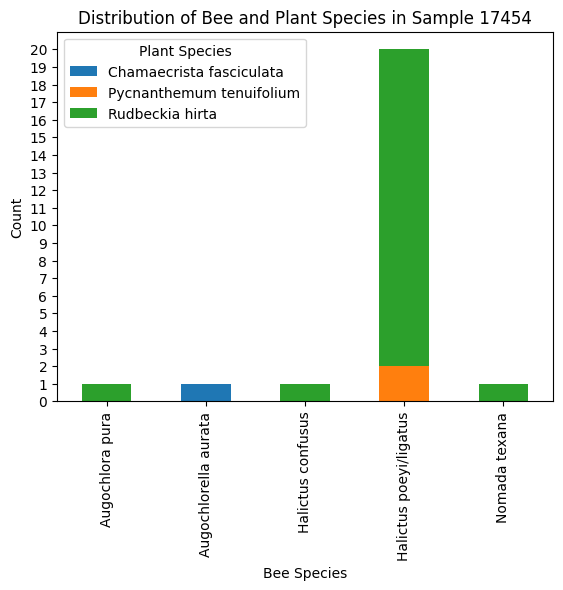

In [275]:
# Select a specific sample for visualization
sample_id = 17454  # Change this to the desired sample ID
sample_data = data[data['sample_id'] == sample_id]

# Group the data by bee species and plant species, and calculate the count
grouped_data = sample_data.groupby(['bee_species', 'plant_species']).size().unstack(fill_value=0)

# Plot the stacked bar chart
grouped_data.plot(kind='bar', stacked=True)

# Set the axis labels and title
plt.yticks(np.arange(0, 21, 1))
plt.xlabel('Bee Species')
plt.ylabel('Count')
plt.title(f'Distribution of Bee and Plant Species in Sample {sample_id}')

# Show the legend
plt.legend(title='Plant Species', loc='upper left')

# Display the chart
plt.show()

# Question 3: Select the top three plant species you would recommend to the agency to support native bees.

### Insufficient data for native bees 🥲
## However, based on our limited data, the two known plants preferred by native bees are:
##  Trifolium incarnatum and Daucus carota          